### Data Cleaning

In [214]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import MinMaxScaler

### Create Dataframe

In [215]:
# NOTE: this cell was only ran once, doesn't need to be run each time
# pollutants = ['CO/', 'NO2/', 'Ozone/', 'PM2.5/', 'PM10/', 'SO2/']

# # read in files and create dataframe of all data for each pollutant
# for pollutant in pollutants:
#     # empty list to store dfs
#     dfs = []
#     # iterate through files in the directory
#     for filename in os.listdir('data/' + pollutant):
#         df = pd.read_csv('data/' + pollutant + filename)

#         if pollutant == 'PM2.5/':
#             # only keep local conditions of pm2.5
#             df = df[df["AQS Parameter Description"] == "PM2.5 - Local Conditions"]
#         dfs.append(df)

#     # concatenate all dfs in the list
#     merged_df = pd.concat(dfs, ignore_index=True)
#     df = merged_df.drop(columns=["POC", "Source", "Local Site Name", "Percent Complete", "AQS Parameter Code", "AQS Parameter Description", "Method Code", "CBSA Code", "CBSA Name", "State FIPS Code", "State", "Units"])

#     # save the merged DataFrame to a new CSV file
#     df.to_csv('data/All/all_' + pollutant[:-1] + '.csv', index=False)

In [216]:
# NOTE: feel free to edit this cell to make the data cleaner, but otherwise it doesn't need to be run
# read in dataframes for each pollutant and merge into 1
# df_CO = pd.read_csv('data/All/all_CO.csv')
# df_NO2 = pd.read_csv('data/All/all_NO2.csv')
# df_Ozone = pd.read_csv('data/All/all_Ozone.csv')
# df_PM2_5 = pd.read_csv('data/All/all_PM2.5.csv')
# df_PM10 = pd.read_csv('data/All/all_PM10.csv')
# df_SO2 = pd.read_csv('data/All/all_SO2.csv')

# cols = ['Date', 'Site ID', 'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude']

# mergedCO_NO2 = df_CO.merge(df_NO2, on=cols, how="outer", suffixes=(' CO', ' NO2'))
# mergedOzone_PM2 = df_Ozone.merge(df_PM2_5, on=cols, how="outer", suffixes=(' Ozone', ' PM2.5'))
# mergedPM10_SO2 = df_PM10.merge(df_SO2, on=cols, how="outer", suffixes=(' PM10', ' SO2'))
# mergedCO_NO2_Ozone_PM2 = mergedCO_NO2.merge(mergedOzone_PM2, on=cols, how="outer")
# all_merged = mergedCO_NO2_Ozone_PM2.merge(df_PM10, on=cols, how='outer').drop(columns=["Method Description"])

# # reorder cols
# col_order = ["Date", "Site ID", "County", "County FIPS Code", "Site Latitude", "Site Longitude", 
#              "Daily Max 8-hour CO Concentration", "Daily AQI Value CO", "Daily Obs Count CO", 
#              "Daily Max 1-hour NO2 Concentration", "Daily AQI Value NO2", "Daily Obs Count NO2", 
#              "Daily Max 8-hour Ozone Concentration", "Daily AQI Value Ozone", "Daily Obs Count Ozone", 
#              "Daily Mean PM2.5 Concentration", "Daily AQI Value PM2.5", "Daily Obs Count PM2.5",
#              "Daily Mean PM10 Concentration", "Daily AQI Value", "Daily Obs Count"]
# all_merged = all_merged[col_order]
# all_merged.to_csv('data/All/all_merged.csv')

NOTE: columns are measured in different units. CO: ppm, NO2: ppb, Ozone: ppm, PM2.5: ug/m3 LC, PM10: ug/m3 SC

In [217]:
# read in dataframe
df = pd.read_csv('data/All/all_merged.csv', usecols=lambda column: "Unnamed" not in column)

In [218]:
# Display first 5 rows of data
pd.set_option('display.max_columns', None)
df.head()

,Date,Site ID,County,County FIPS Code,Site Latitude,Site Longitude,Daily Max 8-hour CO Concentration,Daily AQI Value CO,Daily Obs Count CO,Daily Max 1-hour NO2 Concentration,Daily AQI Value NO2,Daily Obs Count NO2,Daily Max 8-hour Ozone Concentration,Daily AQI Value Ozone,Daily Obs Count Ozone,Daily Mean PM2.5 Concentration,Daily AQI Value PM2.5,Daily Obs Count PM2.5,Daily Mean PM10 Concentration,Daily AQI Value,Daily Obs Count
0,01/01/2015,490030003,Box Elder,3,41.492707,-112.018863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,28.0,1.0,NaN,NaN,NaN
1,01/01/2015,490037001,Box Elder,3,41.945874,-112.233973,NaN,NaN,NaN,NaN,NaN,NaN,0.036,33.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2015,490050004,Cache,5,41.731111,-111.837500,NaN,NaN,NaN,35.0,33.0,24.0,0.027,25.0,17.0,16.2,64.0,1.0,NaN,NaN,NaN
3,01/01/2015,490050004,Cache,5,41.731111,-111.837500,NaN,NaN,NaN,35.0,33.0,24.0,0.027,25.0,17.0,15.3,63.0,1.0,NaN,NaN,NaN
4,01/01/2015,490071003,Carbon,7,39.595750,-110.770111,NaN,NaN,NaN,NaN,NaN,NaN,0.045,42.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN


Data Type Corrections

In [219]:
# Convert object columns to string
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).astype('string')

# Convert date column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

Remove duplicate data

In [220]:
# Find and remove duplicated data
duplicates = df.duplicated()
print("Removing",df[duplicates].shape[0], "duplicated data points")
df = df[-df.duplicated()]

Removing 9812 duplicated data points


Add Column for weekday/weekend

In [221]:
# Weekend column shows 1 for Saturday and Sunday, 0 for Mon, Tues, Wed, Thurs, Fri
df['Weekend'] = df['Date'].dt.weekday.map(lambda x: 1 if x >= 5 else 0)

Impute Missing Values

In [222]:
print("Row # Before Dropping Rows: ", df.shape[0])
# Drop rows with at least 10 missing values
df = df.dropna(thresh=df.shape[1] - 10 + 1)  # Keep rows with at least (total columns - 15 + 1) non-NaN value
print("Row # After Dropping Rows: ", df.shape[0])


# Select numeric columns for imputation
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

print("Missing Values # Before Iterative Imputation:", df_numeric.isna().sum().sum())

# Initialize Iterative Imputer
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=20, random_state=42)

# Apply iterative imputation
df_numeric_imputed = imputer.fit_transform(df_numeric)

# Assign imputed values back to DataFrame
df[numeric_cols] = df_numeric_imputed

print("Missing Values # After Iterative Imputation:", df.isna().sum().sum())

Row # Before Dropping Rows:  174299
Row # After Dropping Rows:  147722
Missing Values # Before Iterative Imputation: 621549
Missing Values # After Iterative Imputation: 0


Data Range Constraints
- Process: 
    - Look at the data range for each column. Research what the typical data range is for each column. Compare the ranges. 
- Implications: 
    - The data ranges are possible and reasonable.

In [223]:
# Print range of data
def print_column_ranges(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Only process numeric columns
            col_min = df[col].min()
            col_max = df[col].max()
            print(f"{col}: Min = {col_min}, Max = {col_max}")

print_column_ranges(df)

Site ID: Min = 490030003.0, Max = 490571003.0
County FIPS Code: Min = 3.0, Max = 57.0
Site Latitude: Min = 37.179125, Max = 41.945874098
Site Longitude: Min = -113.305096, Max = -109.353931857366
Daily Max 8-hour CO Concentration: Min = -0.3, Max = 2.9
Daily AQI Value CO: Min = 0.0, Max = 33.0
Daily Obs Count CO: Min = 2.0, Max = 77.9625267102092
Daily Max 1-hour NO2 Concentration: Min = -3.0, Max = 135.0
Daily AQI Value NO2: Min = 0.0, Max = 107.0
Daily Obs Count NO2: Min = 18.0, Max = 24.0
Daily Max 8-hour Ozone Concentration: Min = 0.0, Max = 0.12
Daily AQI Value Ozone: Min = 0.0, Max = 216.0
Daily Obs Count Ozone: Min = -2.593512327098324, Max = 68.0
Daily Mean PM2.5 Concentration: Min = -2.3, Max = 138.8
Daily AQI Value PM2.5: Min = 0.0, Max = 214.0
Daily Obs Count PM2.5: Min = 0.9448242465750809, Max = 2.0
Daily Mean PM10 Concentration: Min = -20.0, Max = 375.0
Daily AQI Value: Min = 0.0, Max = 230.0
Daily Obs Count: Min = 1.0, Max = 1.0
Weekend: Min = 0.0, Max = 1.0


Determine and Examine Outliers
- Process:
    - Use IQR:
        - We increase the lower and upper bound coefficient from 1.5 to 3 in order to account for the wide variety of concentrations.

- Implications:
    - When excluding the outliers, we drop 7.09% of rows (10476 rows)
    - We create a boolean column describing if the observation is classified as an ourlier. This will allow us to easily switch between including or excluding outliers.

Number of Rows of Outliers: 64519
Total Number of Rows 147722


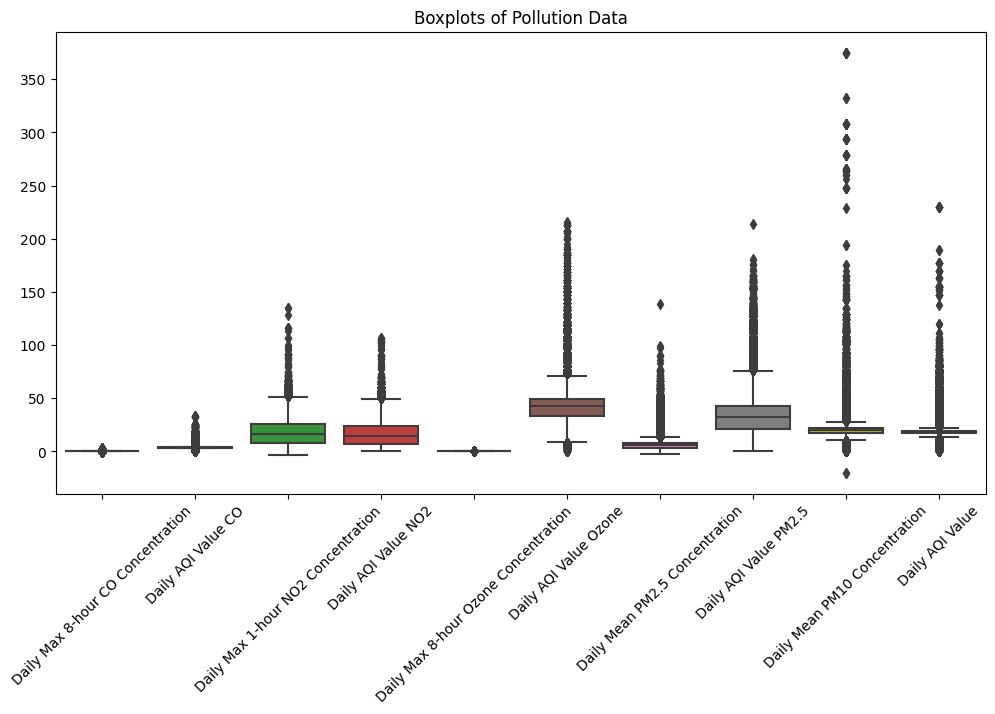

In [224]:
# Select numeric pollution measurement columns
pollution_columns = [
    'Daily Max 8-hour CO Concentration',
    'Daily AQI Value CO', 
    'Daily Max 1-hour NO2 Concentration', 
    'Daily AQI Value NO2',
    'Daily Max 8-hour Ozone Concentration',
    'Daily AQI Value Ozone',
    'Daily Mean PM2.5 Concentration', 
    'Daily AQI Value PM2.5',
    'Daily Mean PM10 Concentration',
    'Daily AQI Value'
]

# Drop non-numeric or missing columns
pol_df = df[pollution_columns]

# Find outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return (data < lower_bound) | (data > upper_bound)

outliers_iqr = pol_df.apply(detect_outliers_iqr)
df['Outlier'] = outliers_iqr.any(axis=1) # Create outlier column in the main df

# Display outliers
outliers_df = df[df['Outlier']]
print(f'Number of Rows of Outliers:', len(outliers_df))
print(f'Total Number of Rows', len(df))


# Plot boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=pol_df)
plt.xticks(rotation=45)
plt.title('Boxplots of Pollution Data')
plt.show()


In [225]:
# Look at data range after removing outliers
after_outliers_df = df[df['Outlier'] == False] # Keep only rows that are not in outliers_df
print_column_ranges(after_outliers_df)

Site ID: Min = 490030003.0, Max = 490571003.0
County FIPS Code: Min = 3.0, Max = 57.0
Site Latitude: Min = 37.179125, Max = 41.945874098
Site Longitude: Min = -113.305096, Max = -109.353931857366
Daily Max 8-hour CO Concentration: Min = 0.3, Max = 0.4
Daily AQI Value CO: Min = 3.0, Max = 5.0
Daily Obs Count CO: Min = 2.0, Max = 77.61323896702379
Daily Max 1-hour NO2 Concentration: Min = -3.0, Max = 74.9
Daily AQI Value NO2: Min = 0.0, Max = 72.0
Daily Obs Count NO2: Min = 18.0, Max = 24.0
Daily Max 8-hour Ozone Concentration: Min = 0.0, Max = 0.069
Daily AQI Value Ozone: Min = 0.0, Max = 97.0
Daily Obs Count Ozone: Min = -1.8873359105348015, Max = 68.0
Daily Mean PM2.5 Concentration: Min = -2.0, Max = 20.0
Daily AQI Value PM2.5: Min = 0.0, Max = 71.0
Daily Obs Count PM2.5: Min = 0.95206739105015, Max = 2.0
Daily Mean PM10 Concentration: Min = 12.0, Max = 27.0
Daily AQI Value: Min = 11.0, Max = 25.0
Daily Obs Count: Min = 1.0, Max = 1.0
Weekend: Min = 0.0, Max = 1.0
Outlier: Min = False

Dimension Reduction 
- Process:
    - Use PCA:
        - Captures the most important variations in pollution levels
- Implications:
    - We will use df_pca as input for models

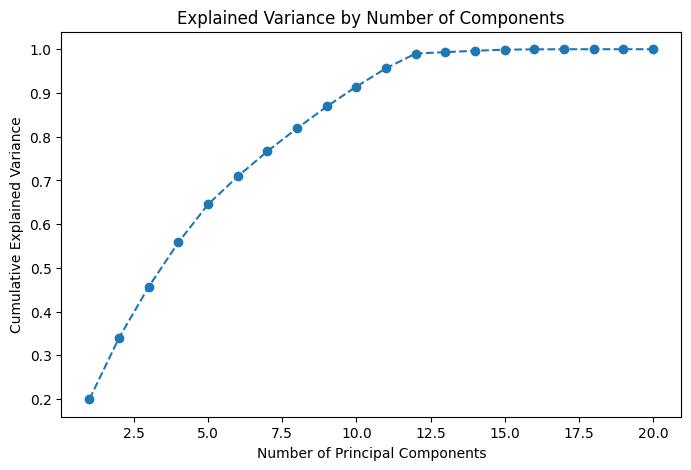

Optimal number of components: 11
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.636484 -0.300179 -2.594938 -0.476295 -1.834976  0.035698 -0.567711   
1  2.560779 -0.361829 -2.600221 -0.464072 -1.825953  0.012144 -0.591640   
2  2.737076 -0.983668 -1.815893 -0.035148 -2.137377  0.198081 -0.850833   
3  0.672099  0.576033 -1.309361 -0.727029  0.152813  0.541909 -1.137396   
4 -0.209236 -0.183201 -1.330822 -1.203175  0.628286 -0.700193 -1.060632   

        PC8       PC9      PC10      PC11  
0 -0.323485  1.116468  0.817458 -0.341801  
1 -0.318405  1.066023  0.769088 -0.287746  
2 -0.520660  0.769129  0.127267 -0.529805  
3 -0.028179  0.663445  0.623223 -0.897125  
4  0.496837  0.519816  0.357589 -0.899163  


In [226]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number]).dropna()

# Standardize the data 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(df_scaled)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance to decide how many components to keep
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.show()

# Keep components that explain at least 95% of the variance
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f'Optimal number of components: {n_components}')

# Transform data using selected components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the optimal principal components
df_pca = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
print(df_pca.head())


Train/Validate/Test Split: 80/10/10 

In [227]:
display(df)

,Date,Site ID,County,County FIPS Code,Site Latitude,Site Longitude,Daily Max 8-hour CO Concentration,Daily AQI Value CO,Daily Obs Count CO,Daily Max 1-hour NO2 Concentration,Daily AQI Value NO2,Daily Obs Count NO2,Daily Max 8-hour Ozone Concentration,Daily AQI Value Ozone,Daily Obs Count Ozone,Daily Mean PM2.5 Concentration,Daily AQI Value PM2.5,Daily Obs Count PM2.5,Daily Mean PM10 Concentration,Daily AQI Value,Daily Obs Count,Weekend,Outlier
2,2015-01-01,490050004.0,Cache,5.0,41.731111,-111.837500,0.326051,3.623692,26.550134,35.0,33.0,24.0,0.027000,25.000000,17.000000,16.200000,64.000000,1.000000,18.702906,19.286897,1.0,0.0,False
3,2015-01-01,490050004.0,Cache,5.0,41.731111,-111.837500,0.325675,3.622331,26.565731,35.0,33.0,24.0,0.027000,25.000000,17.000000,15.300000,63.000000,1.000000,18.621655,19.256097,1.0,0.0,False
5,2015-01-01,490110004.0,Davis,11.0,40.902967,-111.884467,0.326198,3.620508,26.094821,45.0,42.0,24.0,0.029000,27.000000,17.000000,12.000000,56.000000,1.000000,18.497171,19.078645,1.0,0.0,False
6,2015-01-01,490130002.0,Duchesne,13.0,40.294178,-110.009732,0.342498,3.789463,26.284640,22.7,21.0,24.0,0.043979,44.780659,18.017653,10.100000,53.000000,1.000000,19.116549,19.075735,1.0,0.0,False
7,2015-01-01,490137011.0,Duchesne,13.0,40.216779,-110.182742,0.325447,3.702617,23.634687,12.9,11.0,24.0,0.034000,31.000000,17.000000,7.336327,33.603429,1.079076,20.555103,18.733754,1.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184105,2024-12-31,490510001.0,Wasatch,51.0,40.497962,-111.397630,0.324764,3.620796,25.990476,8.6,8.0,23.0,0.030000,28.000000,19.000000,2.300000,13.000000,1.000000,23.031236,17.926415,1.0,0.0,False
184106,2024-12-31,490510001.0,Wasatch,51.0,40.497962,-111.397630,0.324669,3.623052,25.986097,8.6,8.0,23.0,0.030000,28.000000,19.000000,3.100000,17.000000,1.000000,22.692356,18.033171,1.0,0.0,False
184107,2024-12-31,490530007.0,Washington,53.0,37.179125,-113.305096,0.317947,3.303618,26.495173,14.9,13.0,24.0,0.039000,36.000000,19.000000,1.200000,7.000000,1.000000,22.435118,18.023657,1.0,0.0,False
184109,2024-12-31,490571003.0,Weber,57.0,41.303614,-111.987871,0.300000,3.000000,48.000000,18.9,17.0,24.0,0.035000,32.000000,24.000000,1.400000,8.000000,1.000000,2.000000,2.000000,1.0,0.0,True


In [228]:
train_df = df[df['Date'] < '01/01/2023']  # Train 80%
validate_df = df[(df['Date'] >= '01/01/2023') & (df['Date'] < '01/01/2024')]  # Validate 10%
test_df = df[df['Date'] >= '01/01/2024']  # Test 10%

Save to CSV

In [229]:
df.to_csv('AirQuality.csv', index=False)

## Data Cleaning Explanation

#### 1: Dataset Explanation

Response Here.

#### 2: Combining Datasets

Response Here.

#### 3: Problems with the Data

Several features required data type conversions. The 'Date' feature was converted to a datetime object, while all columns of object type were converted to strings for consistency. To deal with missing values, we dropped any rows that had 10 or more missing values since they left too many gaps in the data. After that, the highest percentage of missing values in any column was around 10%, which made K-Nearest Neighbors (KNN) a good choice for filling in the gaps since it uses similar data points to estimate missing values. We also ran into a lot of duplicate rows and are still figuring out whether we accidentally created them when importing the data or if they were already in the original dataset. As for outliers, some values stood out as extreme, but none seemed obviously wrong. Since real-world data naturally has outliers, we decided to keep them. We will set up our code so we can easily include or remove later.

#### 4: Suitable Data for Research Questions

What are the key factors correlated with air quality; how do wildfires and pollution levels influence air quality indices?
- Our data focuses on a variety of pollutants, along with the air quality index. This should help us determine key factors in air quality

How do seasonal patterns, long-term industrial changes, and the implementation of environmental policies affect air quality trends over time?
- We have 10 years worth of data, so finding seasonal patterns is possible, but long term industrial changes and environmental policies over time might be hard to track with our dataset. Adding more data would probably represent the long term questions better.

To what extent can we accurately forecast air quality 3 days in advance using historical data using markov chains and other mathematical techniques?
- We can use the answers of the previous two questions to answer this one, which means our data is suitable for this project.


#### 5: Data Collection

Response Here.

#### 6: Train/Validate/Test Split Methods

We will split the data into three sections: training on the earliest 80% of the data (8 years), validation on the next 10% (1 year), and testing on the most recent 10% (1 year). This way our model only learns from past data to predict future values. To avoid leakage, we will not use future information when training models and will make sure that any feature engineering (such as rolling averages) is based only on past observations. We will fix a random seed when partitioning the validation set to make sure it is reproducible.
- Note: We are currently looking at 10 years of data. This number can increase if needed based on our results. 


#### 7: Dataset Readiness

Response Here.